In [2]:
pip install pandas matplotlib seaborn nltk

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\swast\appdata\local\programs\python\python313\lib\site-packages (2.2.3)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 9.6 MB/s eta 0:00:00




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import warnings

warnings.filterwarnings("ignore")

# Load Data
apps_df = pd.read_csv('googleplaystore.csv')
reviews_df = pd.read_csv('googleplaystore_user_reviews.csv')

# Preprocessing the datasets
apps_df = apps_df.dropna(subset=['Rating'])  # Drop rows with missing ratings
apps_df['Rating'] = pd.to_numeric(apps_df['Rating'], errors='coerce')  # Convert Rating to numeric
apps_df = apps_df.dropna(subset=['Rating'])  # Remove remaining NaN Ratings

# Converting 'Size' column to numeric (MB) and filling NaNs
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1000  # Convert KB to MB
    else:
        return None

apps_df['Size'] = apps_df['Size'].apply(convert_size)
apps_df['Size'].fillna(apps_df['Size'].median(), inplace=True)  # Fill NaN sizes with median

Top 10 Apps by Rating:
                                   App  Rating
10776                 Monster Ride Pro     5.0
615                       Awake Dating     5.0
612      American Girls Mobile Numbers     5.0
654    Speeding Joyride & Car Meet App     5.0
10820                  Fr. Daoud Lamei     5.0
10529               FK CLASSIC FOR YOU     5.0
10416                        FH School     5.0
10407        Jigsaw Volvo FH 16 Trucks     5.0
10357                       Ríos de Fe     5.0
1547                      Eternal life     5.0


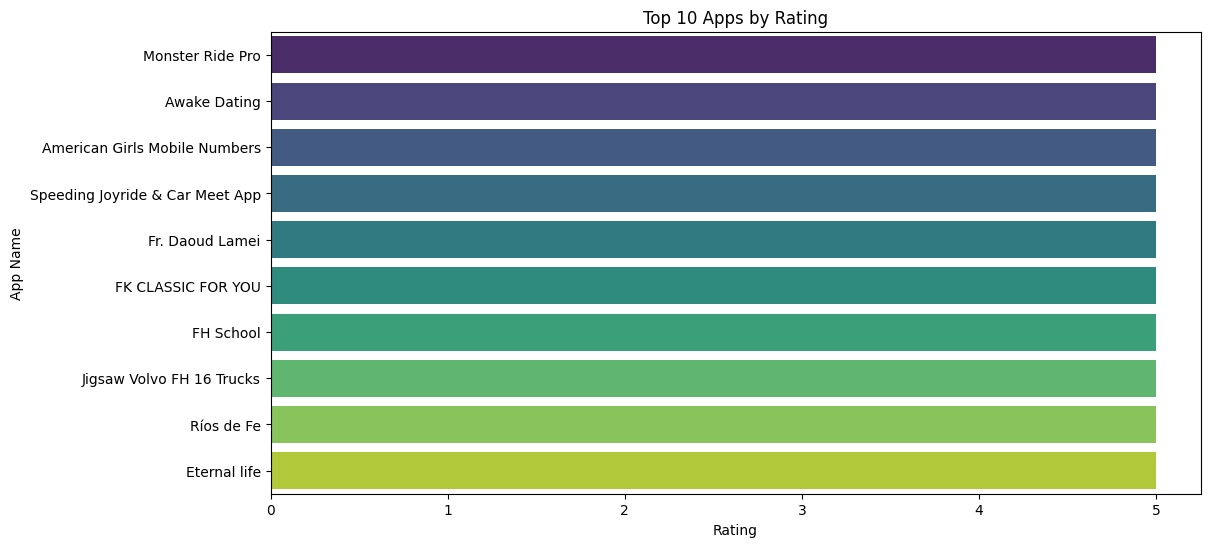

In [15]:
# 1. Top 10 Apps by Rating
top_10_apps = apps_df.sort_values(by='Rating', ascending=False).head(10)
print("Top 10 Apps by Rating:")
print(top_10_apps[['App', 'Rating']])

plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='App', data=top_10_apps, palette='viridis')
plt.title("Top 10 Apps by Rating")
plt.xlabel("Rating")
plt.ylabel("App Name")
plt.show()


Category-wise Distribution of Apps:
Category
FAMILY                 1747
GAME                   1097
TOOLS                   734
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         314
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: count, dtype: int64


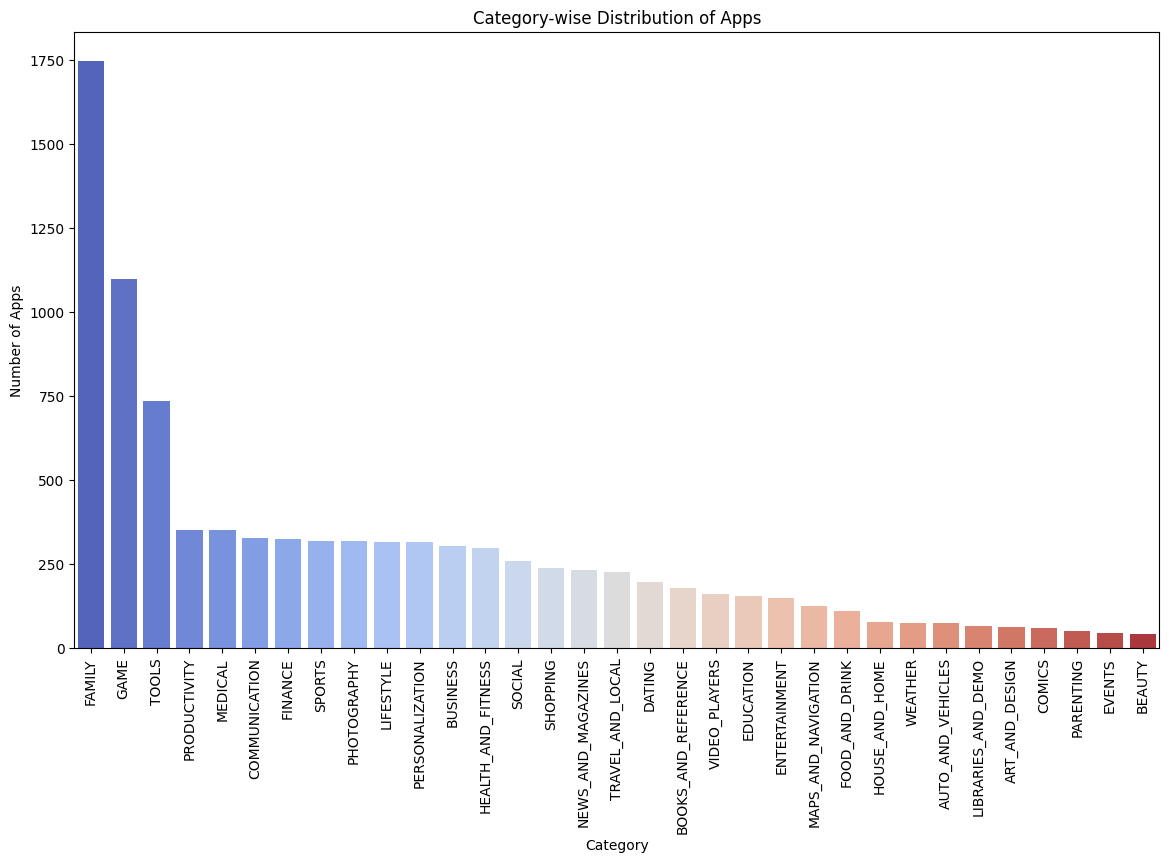

In [16]:
# 2. Category-wise Distribution of Apps
category_counts = apps_df['Category'].value_counts()
print("\nCategory-wise Distribution of Apps:")
print(category_counts)

plt.figure(figsize=(14, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Category-wise Distribution of Apps")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\swast\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Sentiment Analysis Results:
Sentiment
Positive    25526
Negative     7505
Neutral      4396
Name: count, dtype: int64


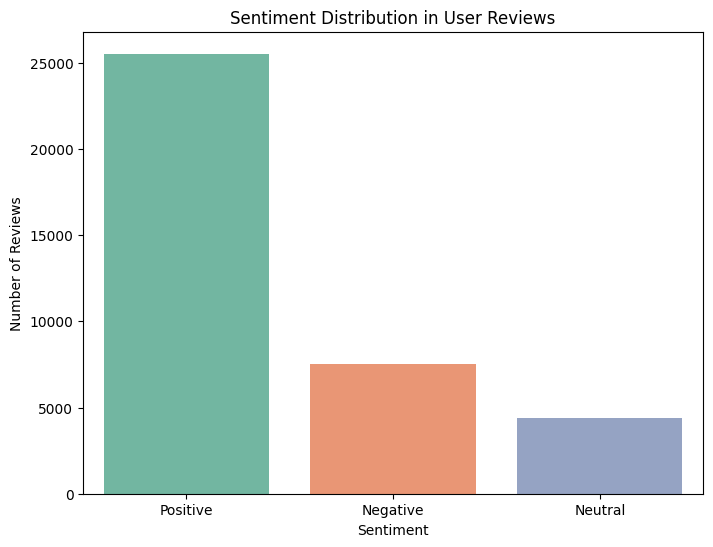

In [17]:
# 3. Sentiment Analysis on User Reviews
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Drop rows with missing reviews
reviews_df = reviews_df.dropna(subset=['Translated_Review'])

# Apply sentiment analysis
reviews_df['Sentiment_Score'] = reviews_df['Translated_Review'].apply(lambda x: sia.polarity_scores(x)['compound'])
reviews_df['Sentiment'] = reviews_df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

sentiment_counts = reviews_df['Sentiment'].value_counts()
print("\nSentiment Analysis Results:")
print(sentiment_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')
plt.title("Sentiment Distribution in User Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()



Correlation Between App Size, Reviews, and Rating:
             Size   Reviews    Rating
Size     1.000000  0.103888  0.067478
Reviews  0.103888  1.000000  0.068141
Rating   0.067478  0.068141  1.000000


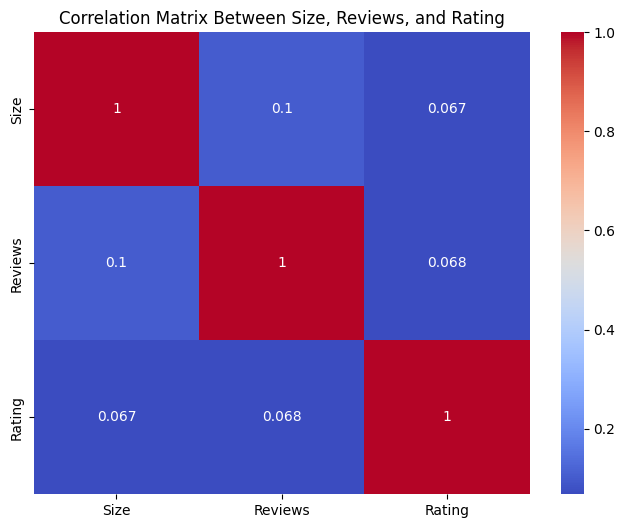

In [18]:

# 4. Correlation Between App Size, Reviews, and Rating
apps_df['Reviews'] = pd.to_numeric(apps_df['Reviews'], errors='coerce')  # Convert Reviews to numeric
apps_df = apps_df.dropna(subset=['Reviews'])  # Remove remaining NaN reviews

correlation = apps_df[['Size', 'Reviews', 'Rating']].corr()
print("\nCorrelation Between App Size, Reviews, and Rating:")
print(correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Between Size, Reviews, and Rating")
plt.show()


Top Categories by Average Rating:
Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335987
PARENTING              4.300000
GAME                   4.286326
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.277104
SHOPPING               4.259664
Name: Rating, dtype: float64


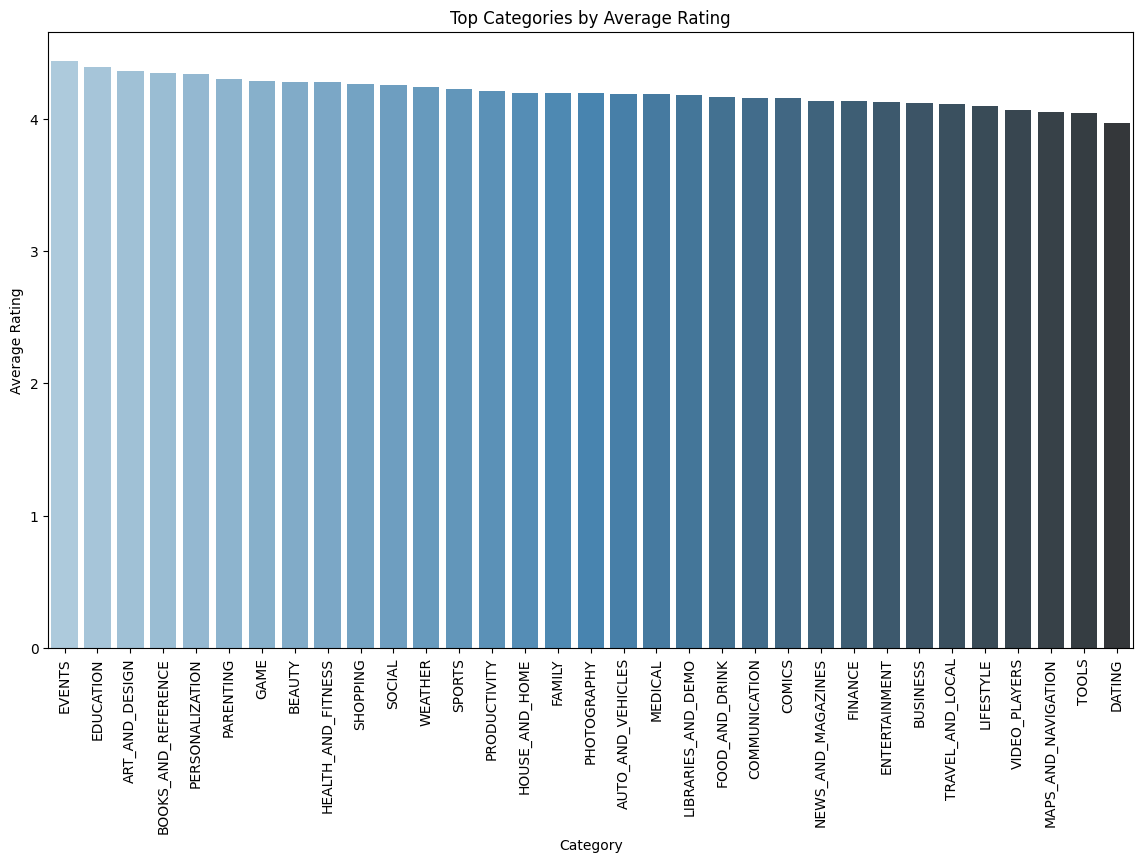

In [5]:
# Top Categories by Average Rating
category_avg_rating = apps_df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

print("\nTop Categories by Average Rating:")
print(category_avg_rating.head(10))

plt.figure(figsize=(14, 8))
sns.barplot(x=category_avg_rating.index, y=category_avg_rating.values, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Top Categories by Average Rating")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()


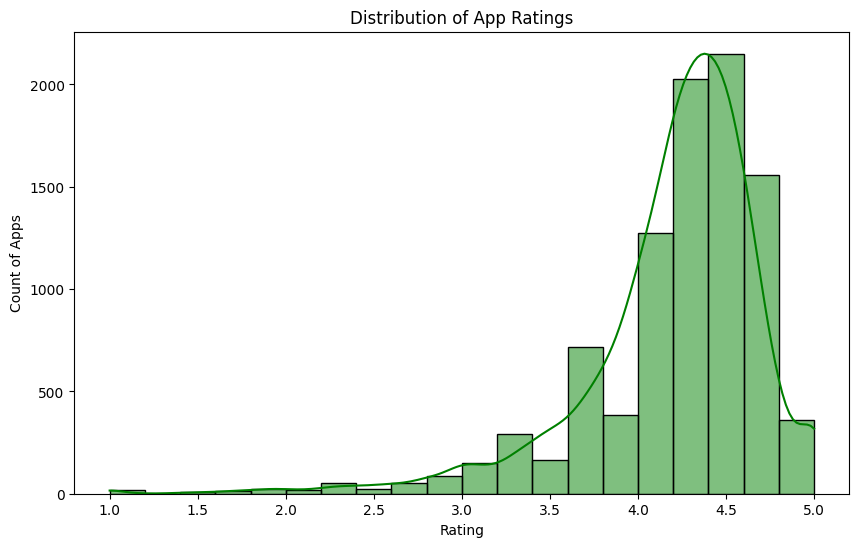

In [6]:
# Distribution of App Ratings
plt.figure(figsize=(10, 6))
sns.histplot(apps_df['Rating'], bins=20, kde=True, color="green")
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Count of Apps")
plt.show()



Top 10 Most Reviewed Apps:
                                           App     Reviews
2544                                  Facebook  78158306.0
3943                                  Facebook  78128208.0
381                         WhatsApp Messenger  69119316.0
336                         WhatsApp Messenger  69119316.0
3904                        WhatsApp Messenger  69109672.0
2604                                 Instagram  66577446.0
2545                                 Instagram  66577313.0
2611                                 Instagram  66577313.0
3909                                 Instagram  66509917.0
382   Messenger – Text and Video Chat for Free  56646578.0


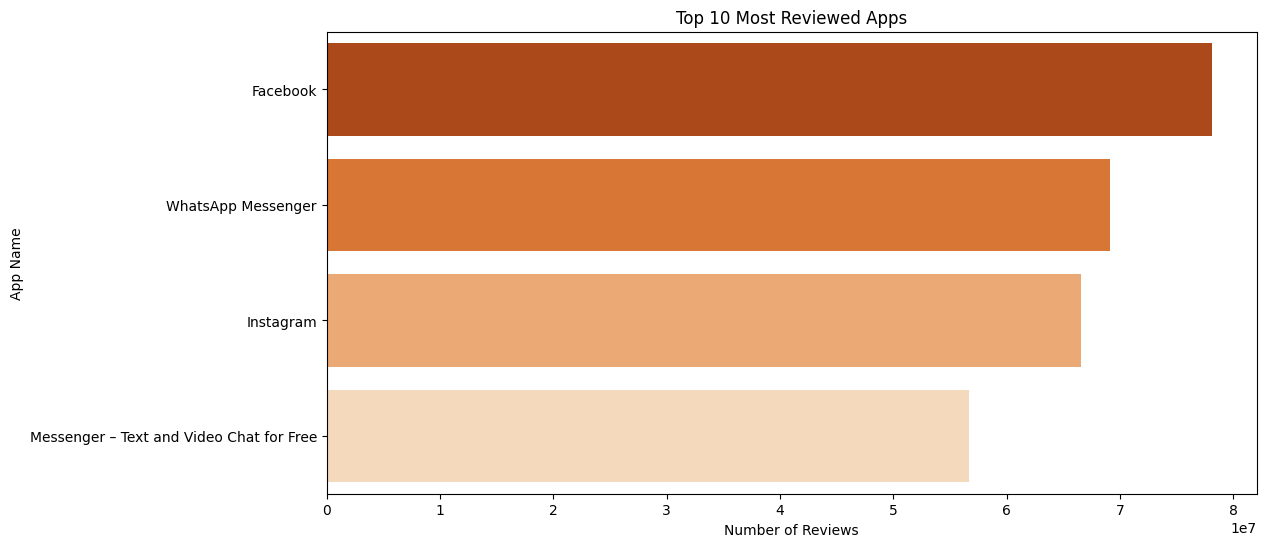

In [7]:
# Top 10 Most Reviewed Apps
top_reviewed_apps = apps_df.sort_values(by='Reviews', ascending=False).head(10)

print("\nTop 10 Most Reviewed Apps:")
print(top_reviewed_apps[['App', 'Reviews']])

plt.figure(figsize=(12, 6))
sns.barplot(x='Reviews', y='App', data=top_reviewed_apps, palette='Oranges_r')
plt.title("Top 10 Most Reviewed Apps")
plt.xlabel("Number of Reviews")
plt.ylabel("App Name")
plt.show()


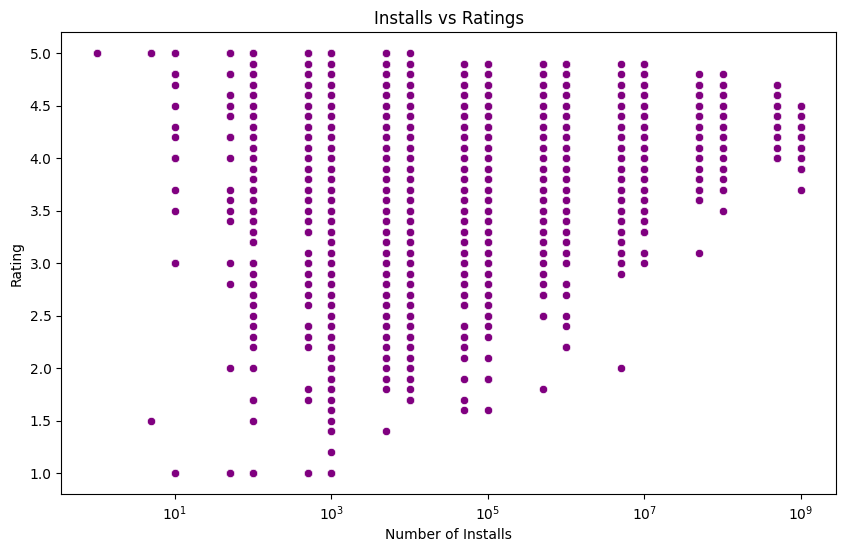

In [8]:
# Convert Installs column to numeric
apps_df['Installs'] = apps_df['Installs'].str.replace('[+,]', '', regex=True).astype(float)

# Scatter Plot: Installs vs. Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Installs', y='Rating', data=apps_df, color="purple")
plt.title("Installs vs Ratings")
plt.xlabel("Number of Installs")
plt.ylabel("Rating")
plt.xscale("log")  # Log scale for better visualization
plt.show()


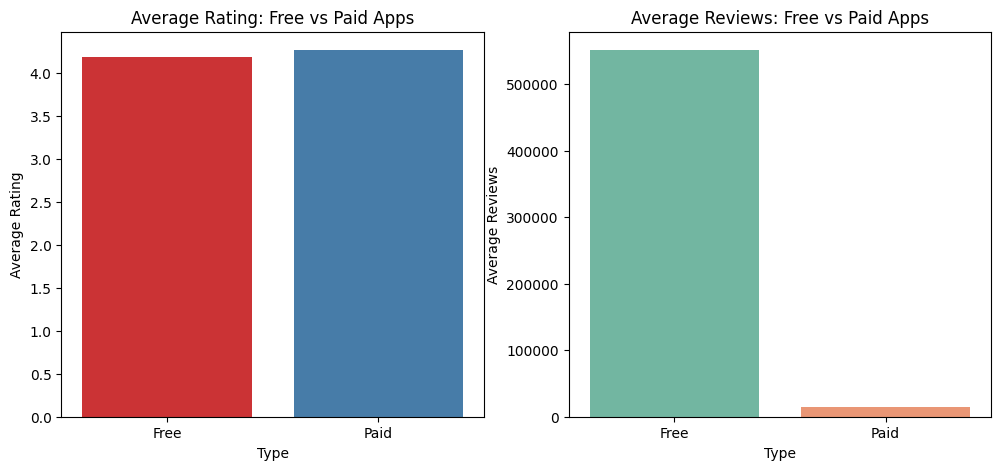

In [9]:
# Creating a column for Free vs Paid apps
apps_df['Type'] = apps_df['Type'].fillna('Free')  # Handle missing values
type_rating = apps_df.groupby('Type')['Rating'].mean()
type_reviews = apps_df.groupby('Type')['Reviews'].mean()

# Plot Average Rating for Free vs Paid
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=type_rating.index, y=type_rating.values, palette="Set1")
plt.title("Average Rating: Free vs Paid Apps")
plt.ylabel("Average Rating")

# Plot Average Reviews for Free vs Paid
plt.subplot(1, 2, 2)
sns.barplot(x=type_reviews.index, y=type_reviews.values, palette="Set2")
plt.title("Average Reviews: Free vs Paid Apps")
plt.ylabel("Average Reviews")
plt.show()


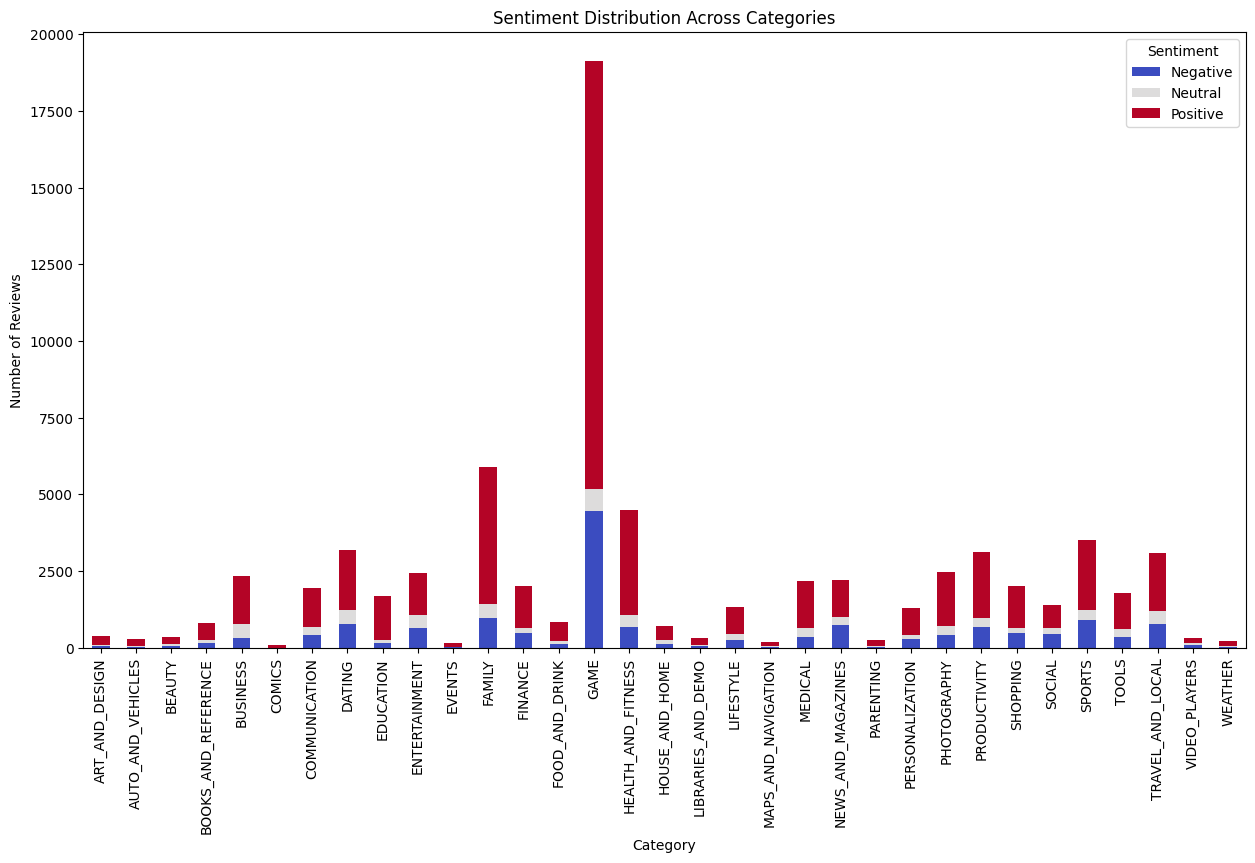

In [10]:
# Merging Reviews with Apps data
merged_df = pd.merge(reviews_df, apps_df[['App', 'Category']], on='App', how='inner')

# Grouping by Category and Sentiment
sentiment_per_category = merged_df.groupby(['Category', 'Sentiment']).size().unstack(fill_value=0)

# Plot Sentiment Distribution Across Categories
sentiment_per_category.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='coolwarm')
plt.title("Sentiment Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=90)
plt.legend(title="Sentiment")
plt.show()


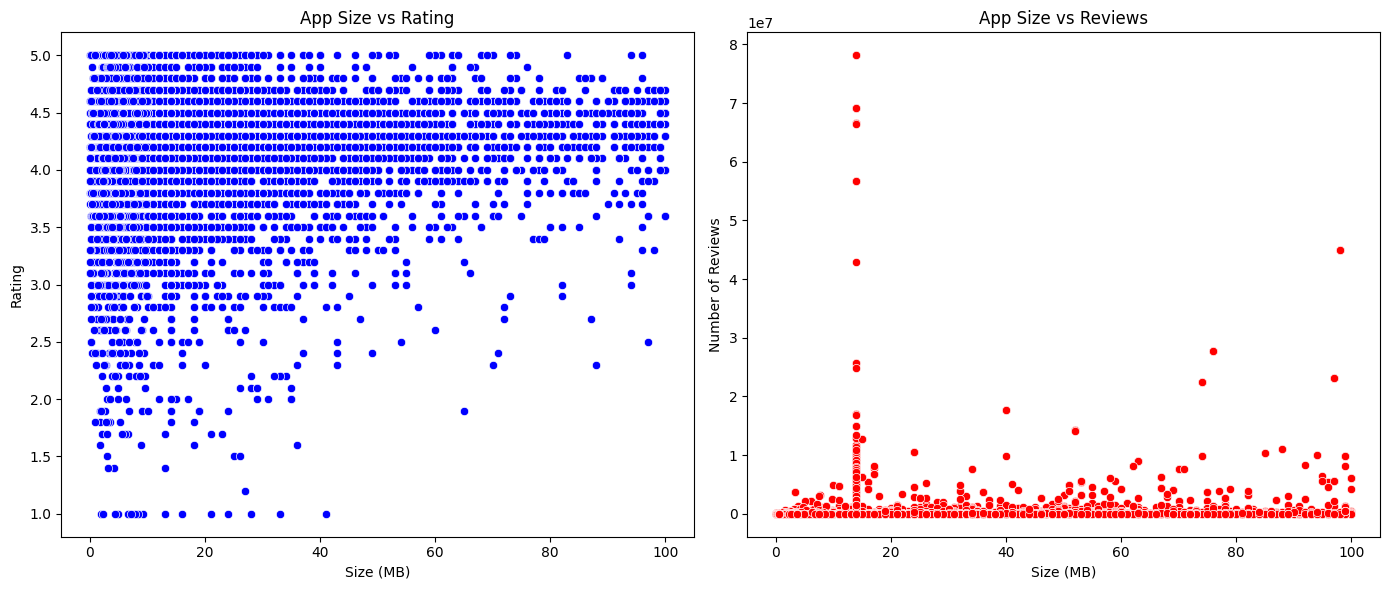

In [11]:
# Scatter Plots: App Size vs Ratings and Reviews
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Size', y='Rating', data=apps_df, color='blue')
plt.title("App Size vs Rating")
plt.xlabel("Size (MB)")
plt.ylabel("Rating")

plt.subplot(1, 2, 2)
sns.scatterplot(x='Size', y='Reviews', data=apps_df, color='red')
plt.title("App Size vs Reviews")
plt.xlabel("Size (MB)")
plt.ylabel("Number of Reviews")

plt.tight_layout()
plt.show()



Content Rating Distribution:
Content Rating
Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: count, dtype: int64


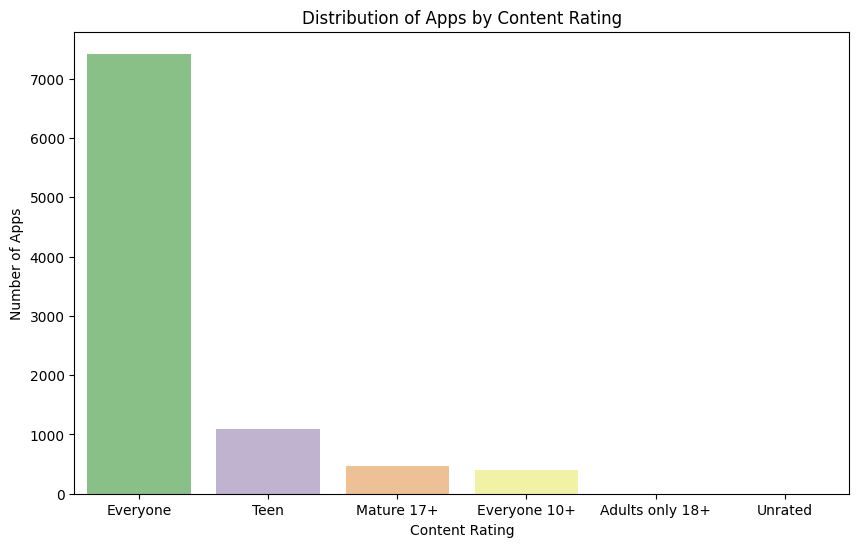

In [12]:
# Content Rating Distribution
content_rating_counts = apps_df['Content Rating'].value_counts()

print("\nContent Rating Distribution:")
print(content_rating_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=content_rating_counts.index, y=content_rating_counts.values, palette='Accent')
plt.title("Distribution of Apps by Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.show()


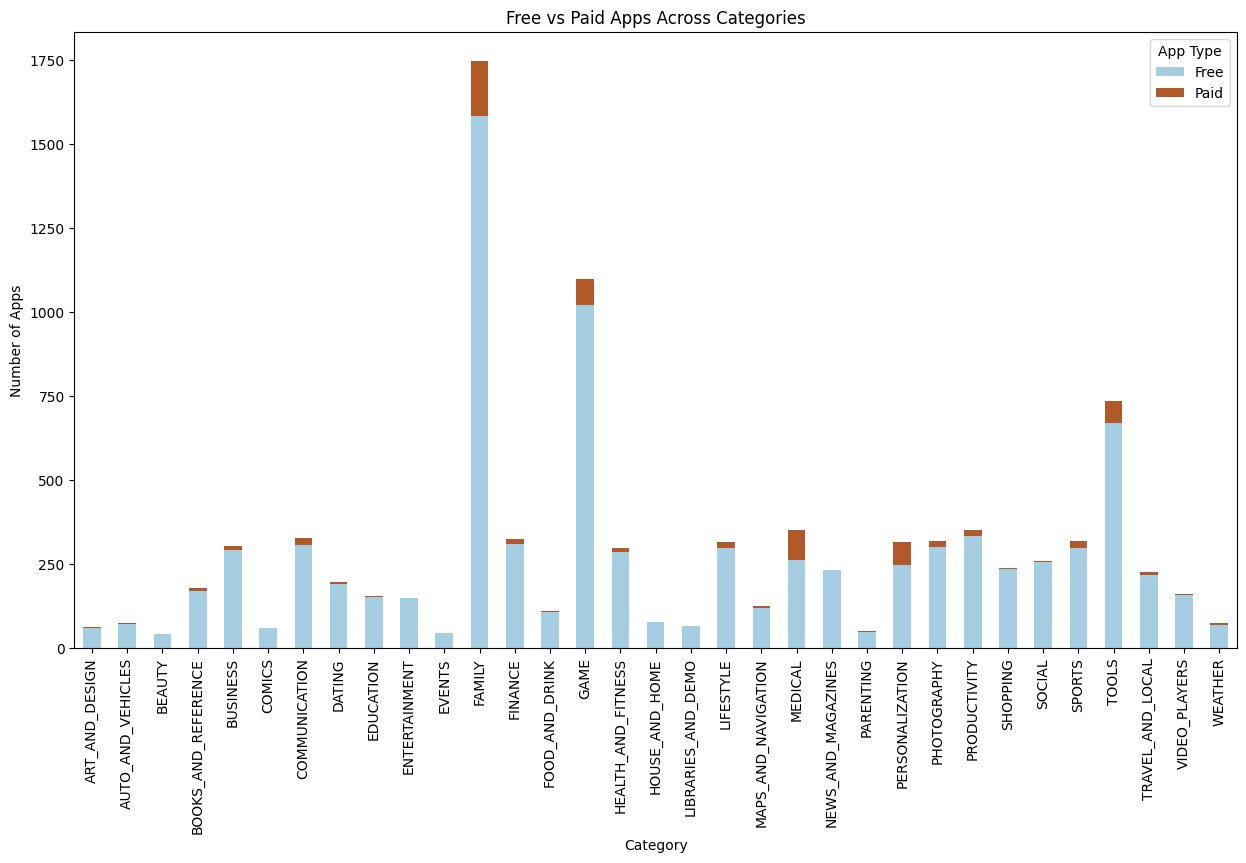

In [13]:
# Free vs Paid Apps per Category
free_paid_category = apps_df.groupby(['Category', 'Type']).size().unstack(fill_value=0)

# Plot Free vs Paid Apps Across Categories
free_paid_category.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='Paired')
plt.title("Free vs Paid Apps Across Categories")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.xticks(rotation=90)
plt.legend(title="App Type")
plt.show()



Top 10 Apps by Installs:
                                App      Installs
2545                      Instagram  1.000000e+09
2544                       Facebook  1.000000e+09
5395                  Google Photos  1.000000e+09
2604                      Instagram  1.000000e+09
4234  Skype - free IM & video calls  1.000000e+09
9844                    Google News  1.000000e+09
4153                       Hangouts  1.000000e+09
4170                   Google Drive  1.000000e+09
4144                        Google+  1.000000e+09
4150                         Google  1.000000e+09


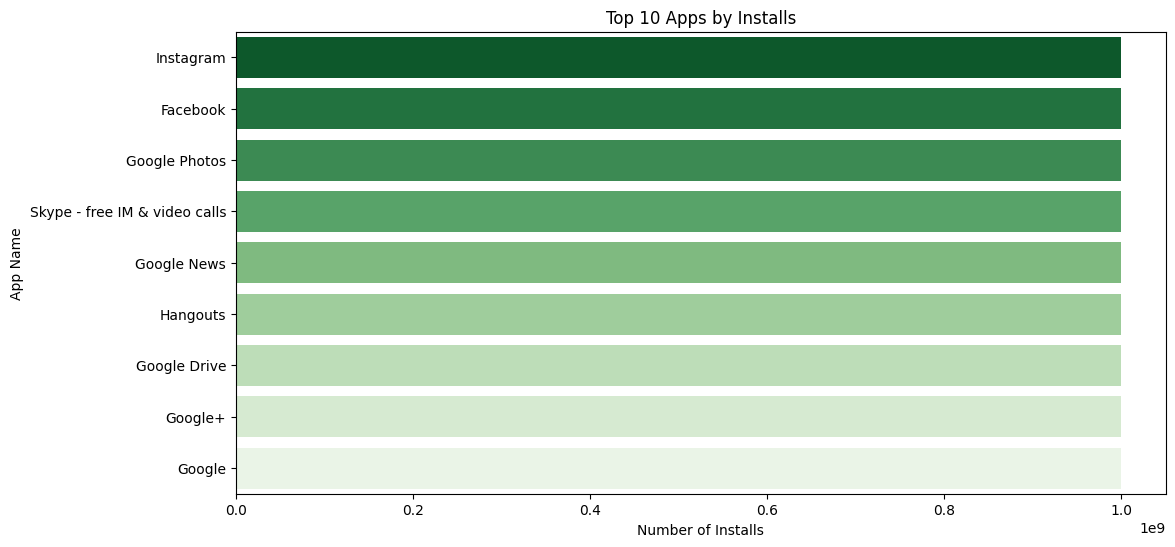

In [14]:
# Top 10 Apps by Installs
top_installed_apps = apps_df.sort_values(by='Installs', ascending=False).head(10)

print("\nTop 10 Apps by Installs:")
print(top_installed_apps[['App', 'Installs']])

plt.figure(figsize=(12, 6))
sns.barplot(x='Installs', y='App', data=top_installed_apps, palette='Greens_r')
plt.title("Top 10 Apps by Installs")
plt.xlabel("Number of Installs")
plt.ylabel("App Name")
plt.show()
